<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_13_Attention_Is_All_You_Need.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Attention Is All You Need**
<img src ='https://nlp.seas.harvard.edu/images/the-annotated-transformer_0_0.png'>

### **[neural-networks_LLM_Transformer_Attention](https://www.3blue1brown.com/topics/neural-networks)**

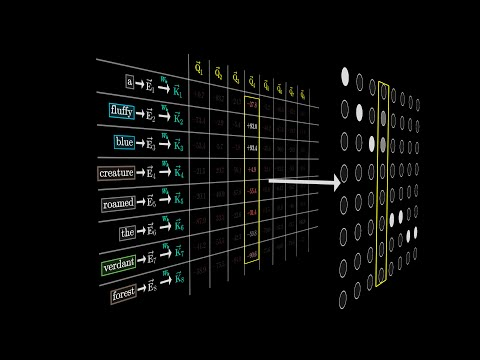

In [ ]:
from IPython.display import YouTubeVideo
from datetime import timedelta

start_time = timedelta(minutes=3, seconds=59).total_seconds()
YouTubeVideo('eMlx5fFNoYc', start=int(start_time))

## 추천 : [딥러닝 트랜스포머 셀프어텐션, Transformer, self attention](https://www.youtube.com/watch?v=DdpOpLNKRJs)
### **[gitbub link](https://github.com/NoCodeProgram/deepLearning/blob/main/transformer/selfAttention.ipynb)**

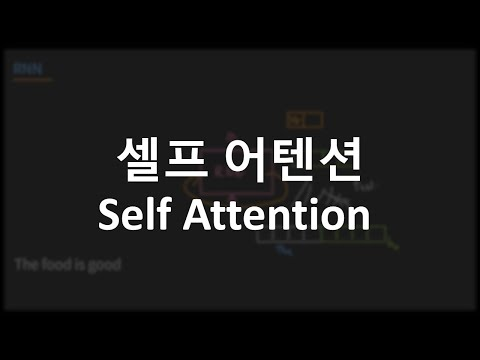

In [ ]:
YouTubeVideo('DdpOpLNKRJs')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 입력 문장을 각 단어로 나누어 토큰화
tokens = ["YOUR", "CAT", "IS", "A", "LOVELY", "CAT"]

# 각 토큰을 6차원 임베딩 벡터로 임의로 표현 (차원 수는 18으로 가정)
np.random.seed(42)  # 임의의 난수를 재현 가능하게 하기 위해 시드 설정
embedding_dim = 18  # 임베딩 차원 수
# 각 토큰에 대해 랜덤하게 6차원 벡터를 생성하여 임베딩으로 사용
token_embeddings = {token: np.random.rand(embedding_dim) for token in tokens}

# Query, Key, Value 행렬 생성
# Query, Key, Value 모두 동일하게 토큰의 임베딩 벡터를 사용하여 설정
Q = np.array([token_embeddings[token] for token in tokens])
K = np.array([token_embeddings[token] for token in tokens])
V = np.array([token_embeddings[token] for token in tokens])

# 1. Query와 Key의 내적 계산 (QK^T)
attention_scores = np.dot(Q, K.T)  # Query와 Key의 내적을 통해 각 토큰 쌍의 유사도를 계산

# 2. Scaling by sqrt(d_k) (여기서 d_k는 6입니다)
d_k = Q.shape[1]  # 임베딩 차원 수 (d_k)
scaled_attention_scores = attention_scores / np.sqrt(d_k)  # 점수 스케일링

# 3. Softmax 적용
def softmax(x):
    # 안정성을 위해 입력 행렬에서 최대 값을 빼준 후 softmax 계산 (오버플로 방지)
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

attention_weights = softmax(scaled_attention_scores)  # Softmax를 통해 확률로 변환된 Attention Weights 계산

# 4. Value 행렬과 곱해 최종 Attention 계산
attention_output = np.dot(attention_weights, V)  # 가중치와 Value 행렬을 곱하여 최종 출력 계산

# 스토리: 도서관에서 책을 찾는 상황으로 설명
# 도서관에 있는 여러 책들(Key) 중에서 "CAT"이라는 주제(Query)를 포함하는 책을 찾는 과정이라고 생각할 수 있습니다.
# "CAT"이라는 질문을 가지고 도서관의 모든 책들(Key)을 조회(QK^T)하여 얼마나 관련이 있는지 유사도를 계산합니다.
# 유사도가 높은 책들은 스케일링하고, Softmax를 적용하여 어떤 책에 더 주목할지 가중치를 정합니다.
# 마지막으로, 이 가중치와 Value(책들의 실제 내용)를 조합하여 최종적으로 어떤 정보를 가져올지를 결정합니다.


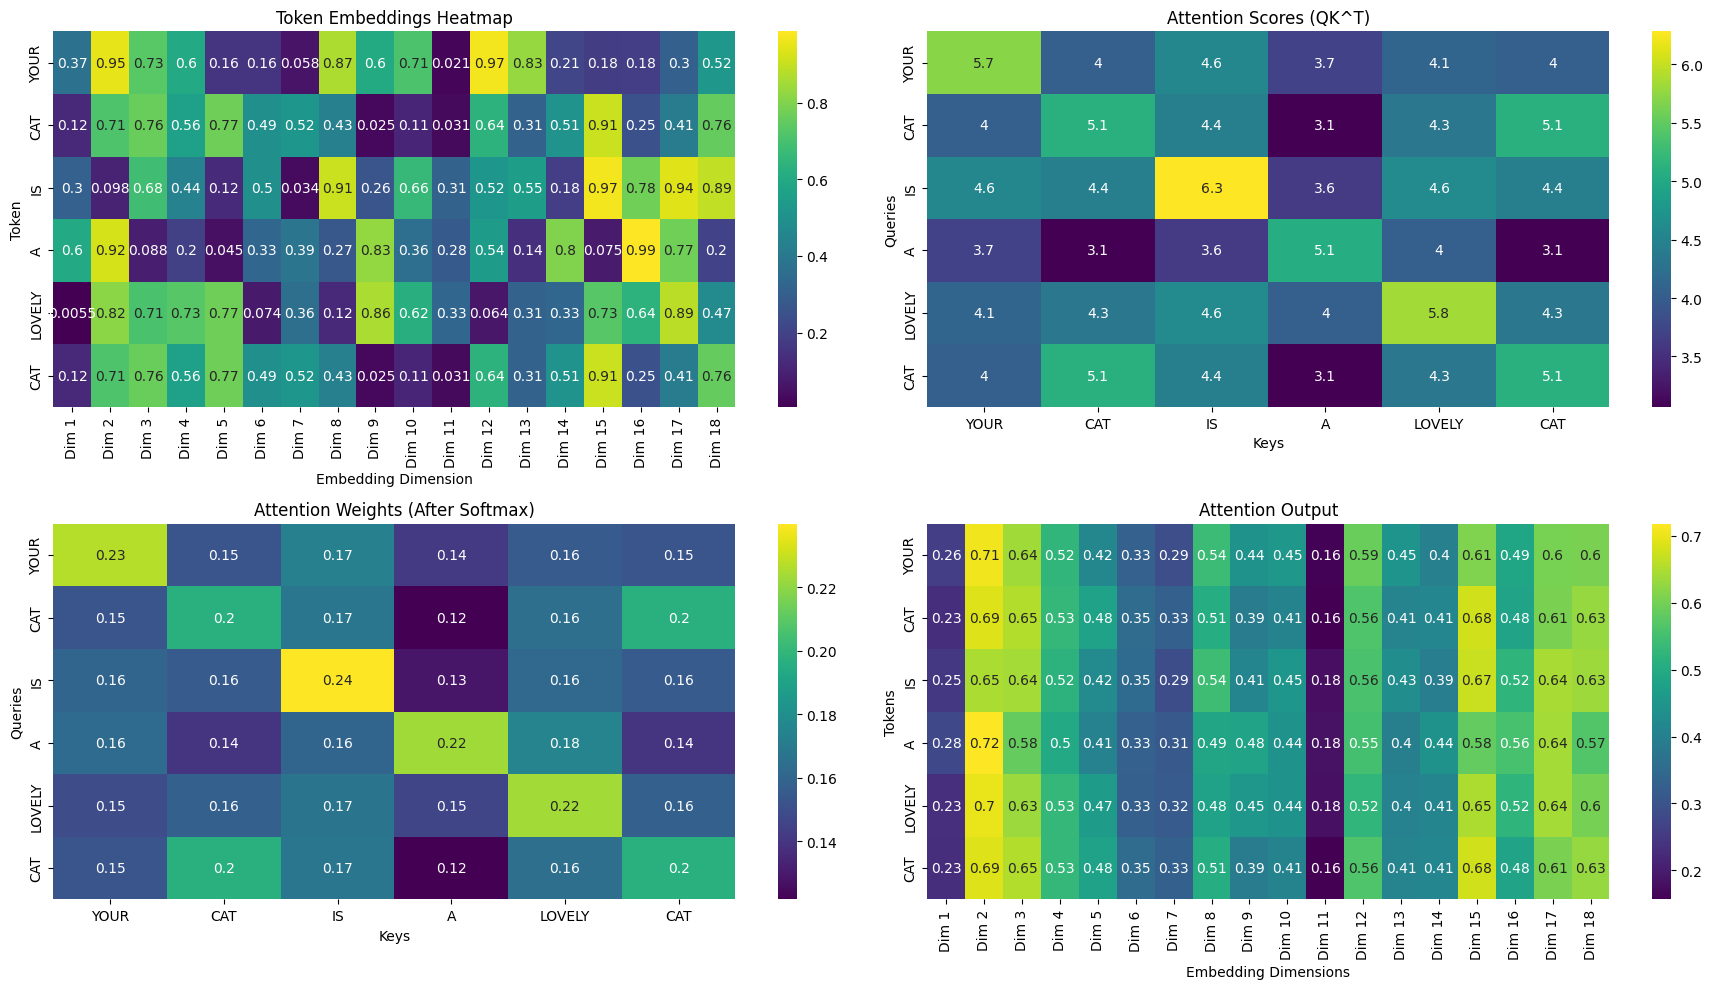

In [ ]:
# 시각화
plt.figure(figsize=(18, 10))  # 전체 figure 크기 설정

# 0. token_embeddings 시각화
plt.subplot(2, 2, 1)  # 첫 번째 subplot (1행 3열 중 첫 번째 위치)
sns.heatmap(np.array([token_embeddings[token] for token in tokens]),
            annot=True, cmap='viridis', xticklabels=[f"Dim {i+1}" for i in range(embedding_dim)], yticklabels=tokens)
plt.title('Token Embeddings Heatmap')
plt.xlabel('Embedding Dimension')
plt.ylabel('Token')

# 1. QK^T (Attention Scores) 시각화
plt.subplot(2, 2, 2)  # 첫 번째 subplot (1행 3열 중 첫 번째 위치)
sns.heatmap(attention_scores, annot=True, cmap='viridis', xticklabels=tokens, yticklabels=tokens)
plt.title("Attention Scores (QK^T)")  # 제목 설정
plt.xlabel("Keys")  # x축 레이블 설정
plt.ylabel("Queries")  # y축 레이블 설정

# 2. Softmax 적용 후 Attention Weights 시각화
plt.subplot(2, 2, 3)  # 두 번째 subplot (1행 3열 중 두 번째 위치)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=tokens, yticklabels=tokens)
plt.title("Attention Weights (After Softmax)")  # 제목 설정
plt.xlabel("Keys")  # x축 레이블 설정
plt.ylabel("Queries")  # y축 레이블 설정

# 3. 최종 Attention Output 시각화
plt.subplot(2, 2, 4)  # 세 번째 subplot (1행 3열 중 세 번째 위치)
sns.heatmap(attention_output, annot=True, cmap='viridis',
            xticklabels=["Dim " + str(i+1) for i in range(embedding_dim)], yticklabels=tokens)
plt.title("Attention Output")  # 제목 설정
plt.xlabel("Embedding Dimensions")  # x축 레이블 설정
plt.ylabel("Tokens")  # y축 레이블 설정

plt.tight_layout()  # 레이아웃을 자동으로 조정하여 subplot 간의 겹침 방지
plt.show()  # 시각화 결과 출력


- 첫번째 : 원자료 Word Embedding
- 두 번째 히트맵 (Attention Scores): Query와 Key의 유사도를 나타내며, 토큰 간의 유사도를 시각적으로 확인할 수 있습니다.
- 세 번째 히트맵 (Attention Weights): Softmax를 적용한 후의 가중치로, 각 Query가 다른 Key에 얼마나 집중해야 하는지를 나타냅니다.
- 네 번째 히트맵 (Attention Output): 최종적으로 각 토큰이 문장 내에서 얻은 정보로서, 각 토큰에 대해 문맥적으로 중요한 부분이 반영된 최종 결과 Word Embedding
- 이러한 Attention 메커니즘은 자연어 처리에서 문장의 중요한 부분을 파악하고, 문맥 상의 관계를 잘 반영하도록 돕기 때문에 Transformer와 같은 최신 모델에서 매우 중요한 역할을 하고 있습니다.

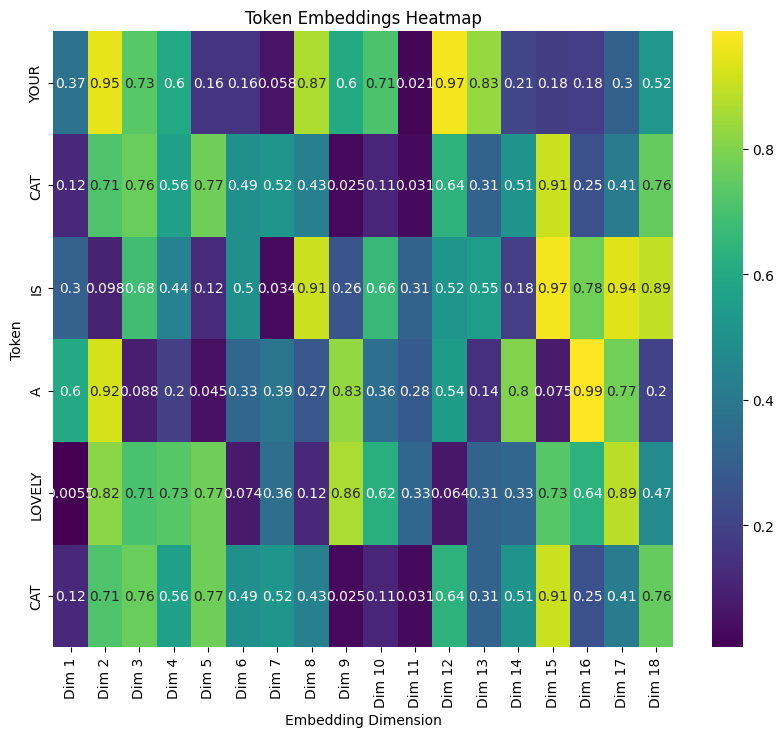

In [ ]:
# prompt: {token: np.random.rand(embedding_dim) for token in tokens}을 시각화 heatmap

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'tokens' and 'token_embeddings' are defined as in the previous code

# Create the heatmap
plt.figure(figsize=(10, 8))


In [ ]:
token_embeddings

In [ ]:
sns.heatmap(token_embeddings, annot=True, cmap='viridis',
            xticklabels=["Dim " + str(i+1) for i in range(embedding_dim)], yticklabels=tokens)
plt.title("Attention Output")  # 제목 설정
plt.xlabel("Embedding Dimensions")  # x축 레이블 설정
plt.ylabel("Tokens")  # y축 레이블 설정

plt.tight_layout()  # 레이아웃을 자동으로 조정하여 subplot 간의 겹침 방지
plt.show()  # 시각화 결과 출력

{'YOUR': array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
        0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
        0.18340451, 0.30424224, 0.52475643]),
 'CAT': array([0.11959425, 0.71324479, 0.76078505, 0.5612772 , 0.77096718,
        0.4937956 , 0.52273283, 0.42754102, 0.02541913, 0.10789143,
        0.03142919, 0.63641041, 0.31435598, 0.50857069, 0.90756647,
        0.24929223, 0.41038292, 0.75555114]),
 'IS': array([0.30461377, 0.09767211, 0.68423303, 0.44015249, 0.12203823,
        0.49517691, 0.03438852, 0.9093204 , 0.25877998, 0.66252228,
        0.31171108, 0.52006802, 0.54671028, 0.18485446, 0.96958463,
        0.77513282, 0.93949894, 0.89482735]),
 'A': array([0.59789998, 0.92187424, 0.0884925 , 0.19598286, 0.04522729,
        0.32533033, 0.38867729, 0.27134903, 0.82873751, 0.35675333,
        0.28093451, 0.54269608, 0.14092422, 0.80219698, 0.07455064,
        0.98688694, 

## 1. Attention Scores: Query와 Key의 유사도를 나타내며, 토큰 간의 유사도를 시각적으로 확인


<Axes: >

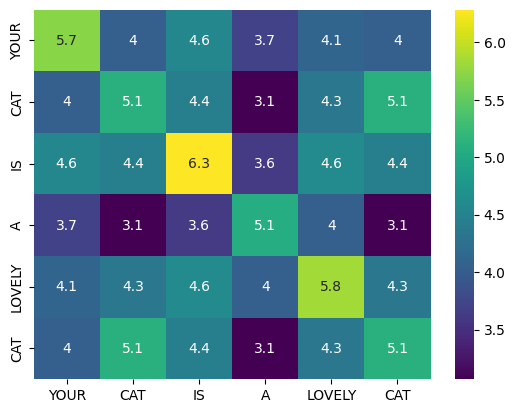

In [ ]:
sns.heatmap(attention_scores, annot=True, cmap='viridis', xticklabels=tokens, yticklabels=tokens)

In [ ]:
# compute selfattention
self_attention = np.dot(attention_scores, V)
print(self_attention.shape)

(6, 18)

<Axes: >

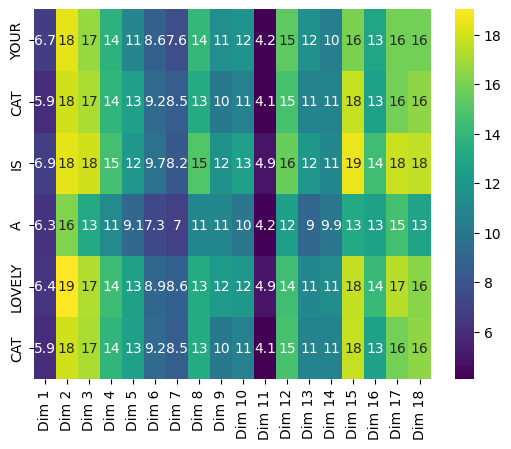

In [ ]:
# 이 매트릭스의 각 행은 단어의 의미(임베딩으로 주어진 것)
# 문장에서의 위치(위치 인코딩으로 나타낸 것),
# 단어가 다른 단어들과 상호작용하는 방식도 포착합니다.
sns.heatmap(self_attention, annot=True, cmap='viridis',
            xticklabels=["Dim " + str(i+1) for i in range(embedding_dim)],
            yticklabels=tokens)

### 2. attention_weights의 의미
- attention_weights는 Query와 Key를 기반으로 토큰 간의 연관성을 나타내는 확률 가중치입니다.

- 계산 과정:
Query와 Key의 내적 계산 (QK^T): 각 Query 벡터와 Key 벡터의 내적을 계산하여, 각 토큰 쌍의 유사도를 얻습니다. 내적이 클수록 두 토큰이 유사하거나 연관성이 높다는 것을 의미합니다.
Scaling by sqrt(d_k): 주의할 점은 각 벡터의 차원이 높아질수록 내적의 값도 커지기 쉽기 때문에, 이를 적절하게 조정하기 위해서 차원 수의 제곱근으로 나누어 스케일링합니다.
Softmax 적용: Softmax를 사용하여 유사도 값을 확률로 변환합니다. 즉, 각 Query에 대해 전체 Key들에 대한 확률 분포로 나타내기 때문에, 이 값들을 합치면 항상 1이 됩니다. 이를 통해 주어진 Query가 어떤 Key에 가장 주목해야 하는지를 나타내는 가중치를 계산합니다.
해석:
attention_weights는 토큰 간의 주목 정도를 나타냅니다. 각 행은 특정 Query가 있을 때 각 Key에 얼마나 집중해야 하는지를 확률로 나타냅니다.
예를 들어, "YOUR"라는 Query가 있을 때, 다른 토큰들(Key) 중에서 어떤 토큰에 더 많은 주목을 할지를 나타냅니다. 값이 클수록 해당 Query와 Key가 더 밀접한 관련이 있음을 의미합니다.
attention_weights의 행렬을 통해 토큰 간의 관계를 이해할 수 있으며, 이를 통해 문맥에서 중요한 토큰을 판단할 수 있습니다.
도서관 비유:
"CAT"이라는 주제를 가진 질문(Query)이 있을 때, 도서관에서 "CAT"과 관련된 정보(Key)들이 얼마나 관련이 있는지를 찾는 과정이라고 할 수 있습니다. 이 과정에서 attention_weights는 어떤 책이 가장 관련이 있는지에 대해 집중할 비율을 결정하는 역할을 합니다.

In [ ]:
attention_weights = softmax(scaled_attention_scores)
attention_weights.shape

(6, 6)

<Axes: >

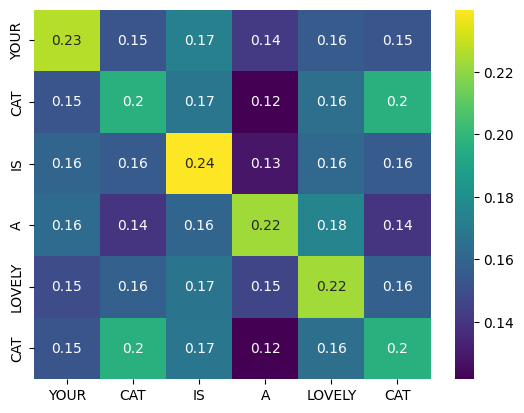

In [ ]:
sns.heatmap(attention_weights, annot=True, cmap='viridis',
            xticklabels=tokens,
            yticklabels=tokens)

### 3. attention_output의 의미
- attention_output은 각 토큰에 대해 계산된 주목 가중치(attention_weights)를 사용하여 Value 행렬을 조합한 최종 출력입니다.

- 계산 과정:
attention_output은 attention_weights와 Value 행렬을 곱하여 계산됩니다. 즉, 각 Query에 대한 주목 가중치를 사용하여 Value 행렬에서 의미 있는 정보를 추출합니다.
각 행은 특정 Query에 대한 최종 정보를 나타내며, 각 Value 벡터에 attention_weights를 곱하여 가중 평균을 구하는 형태로 이해할 수 있습니다.
해석:
attention_output은 각 토큰에 대해 문맥 상 중요한 정보의 가중 평균입니다. 즉, 주어진 토큰이 문장 내 다른 토큰들과의 관계를 고려하여 어떤 정보를 최종적으로 전달할지를 결정한 값입니다.
예를 들어, 문장 내에서 "CAT"이라는 단어가 두 번 등장하고, 이 단어가 전체적으로 중요한 정보로 강조된다면, attention_output은 이러한 맥락 정보를 반영한 최종 벡터를 출력하게 됩니다.
도서관 비유:
도서관에서 특정 주제(Query)에 대해 여러 책들을(Key) 통해 탐색한 결과, 관련된 책들에서 중요한 정보들만(Value) 조합하여 최종적으로 얻은 정보라고 할 수 있습니다. 즉, "CAT"이라는 질문에 대한 책의 실제 내용(Value)을 주목도에 따라 가중 평균하여 최종적인 답변을 제공하는 과정입니다.



<Axes: >

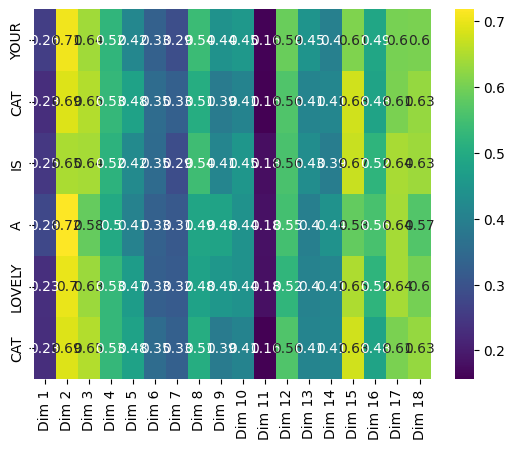

In [ ]:
sns.heatmap(attention_output, annot=True, cmap='viridis',
            xticklabels=["Dim " + str(i+1) for i in range(embedding_dim)], yticklabels=tokens)

##### Word Embedding 행렬을 자기 자신과 내적하는 경우, 결과로 나타나는 행렬은 보통 단어들 간의 유사도 또는 연관성을 나타냅니다. 구체적으로는, 단어 임베딩 벡터 간의 내적을 수행하면 두 벡터 사이의 **코사인 유사도(Cosine Similarity)**와 비슷한 개념으로서, 두 단어가 얼마나 비슷한지에 대한 정량적 값을 얻을 수 있습니다.

**[Attention is all you need (Transformer) - Model explanation (including math), Inference and Training](https://www.youtube.com/watch?v=bCz4OMemCcA)**

In [ ]:
import gensim.downloader as api
import numpy as np

# Gensim을 사용해 사전 훈련된 Word2Vec 모델을 로드합니다.
word2vec_model = api.load("glove-wiki-gigaword-50")
# 사용할 단어 리스트를 선택합니다.
words = ["king", "queen", "prince", "princess", "man", "woman", "child"]

# 선택한 단어들의 임베딩 벡터를 가져옵니다.
embedding_vectors = [word2vec_model[word] for word in words]

# 임베딩 벡터 배열을 numpy 행렬로 변환합니다.
embedding_matrix = np.array(embedding_vectors)

# 내적 행렬을 계산합니다. (Embedding Matrix * Embedding Matrix^T)
similarity_matrix = np.dot(embedding_matrix, embedding_matrix.T)

# 유사도 행렬 출력
import pandas as pd

similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,king,queen,prince,princess,man,woman,child
king,28.885056,21.877504,22.499380,18.489101,14.965230,12.324945,11.910411
queen,21.877504,26.964754,20.645071,25.256697,14.615335,17.378965,13.983871
prince,22.499380,20.645071,25.835468,21.585642,13.524954,12.430899,9.225838
princess,18.489101,25.256697,21.585642,32.626495,13.202135,18.364790,13.474679
man,14.965230,14.615335,13.524954,13.202135,27.504673,25.906172,20.116716
woman,12.324945,17.378965,12.430899,18.364790,25.906172,31.081322,24.477451
child,11.910411,13.983871,9.225838,13.474679,20.116716,24.477451,29.321243


<Axes: >

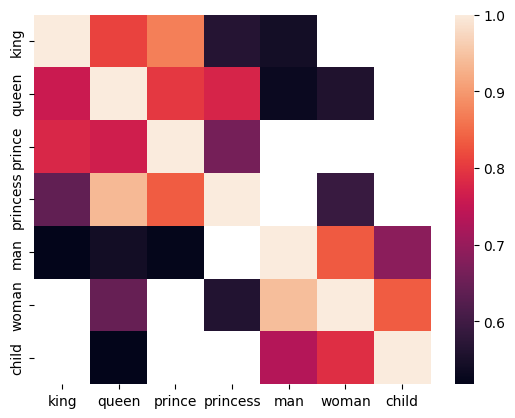

In [ ]:
tf = similarity_df/similarity_df.max()
sns.heatmap(tf[tf>0.5])

<Axes: >

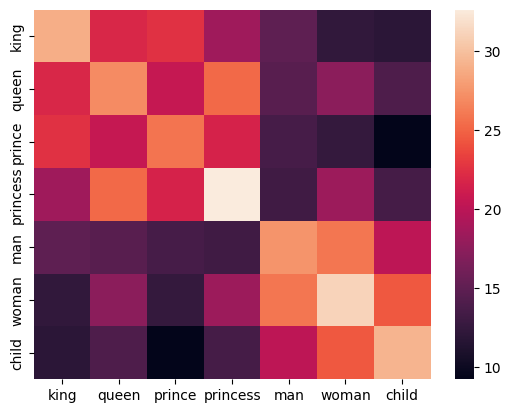

In [ ]:
sns.heatmap(similarity_df)